<a href="https://colab.research.google.com/github/gaganWanjari/Pytorch/blob/main/pytorch_custom_datasets_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

torch.__version__

'2.2.1+cu121'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} Directory already exist")
else:
  print(f"{image_path}does not exist")
  image_path.mkdir(parents=True, exist_ok =True)

with open(data_path/"pizza_steak_sushi.zip","wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Dwonloading")
  f.write(request.content)
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r" ) as zip_ref:
  print("Unzipping pizza, steak, sushi")
  zip_ref.extractall(image_path)

data/pizza_steak_sushidoes not exist
Dwonloading
Unzipping pizza, steak, sushi


In [ ]:
image_path

PosixPath('data/pizza_steak_sushi')

In [ ]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"here are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")


In [ ]:
walk_through_dir(image_path)

here are 2 directories and 0 images in data/pizza_steak_sushi
here are 3 directories and 0 images in data/pizza_steak_sushi/train
here are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
here are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
here are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
here are 3 directories and 0 images in data/pizza_steak_sushi/test
here are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
here are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
here are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza


In [ ]:
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

data/pizza_steak_sushi/train/pizza/2426686.jpg
pizza
Random image path data/pizza_steak_sushi/train/pizza/2426686.jpg


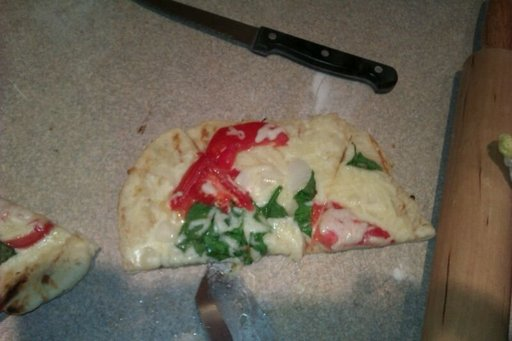

In [ ]:
import random
from PIL import Image

#random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)
print(random_image_path)

image_class = random_image_path.parent.stem
print(image_class)

img = Image.open(random_image_path)
print(f"Random image path {random_image_path}")
img.height, img.width
img

Text(0.5, 1.0, 'sushi')

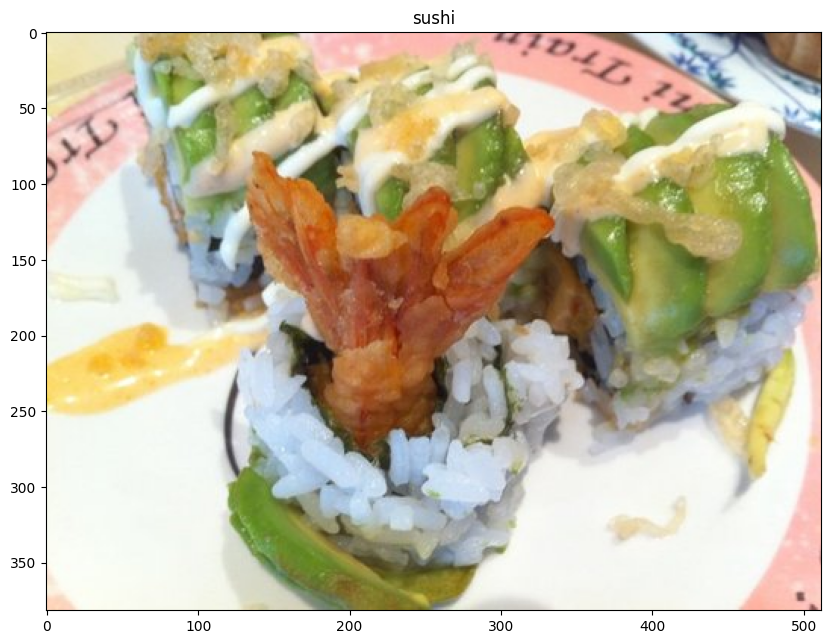

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(10,10))
plt.imshow(img_as_array)
plt.title(image_class)

array([[[236, 232, 185],
        [237, 233, 186],
        [238, 234, 187],
        ...,
        [131,  90,  62],
        [127,  86,  58],
        [128,  87,  59]],

       [[236, 232, 185],
        [237, 233, 186],
        [238, 234, 187],
        ...,
        [131,  90,  62],
        [127,  86,  58],
        [126,  85,  57]],

       [[236, 232, 185],
        [236, 232, 185],
        [237, 233, 186],
        ...,
        [133,  92,  62],
        [130,  89,  59],
        [126,  85,  55]],

       ...,

       [[253, 209, 184],
        [253, 211, 186],
        [255, 212, 185],
        ...,
        [249, 194, 187],
        [255, 202, 195],
        [251, 196, 189]],

       [[251, 209, 184],
        [252, 212, 186],
        [254, 212, 187],
        ...,
        [212, 159, 153],
        [245, 192, 186],
        [254, 201, 195]],

       [[253, 213, 187],
        [254, 214, 188],
        [255, 215, 189],
        ...,
        [184, 131, 127],
        [231, 178, 172],
        [248, 195, 189]]], dtype=uint8)
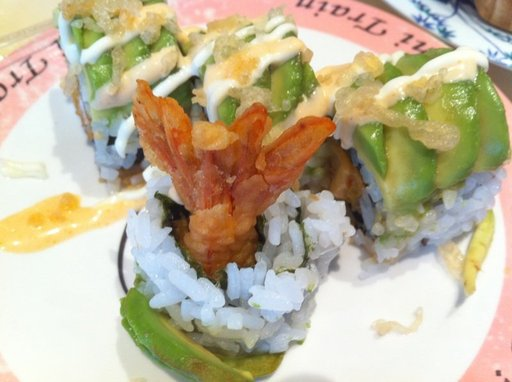

In [ ]:
img_as_array

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [ ]:
data_transform(img).dtype

torch.float32

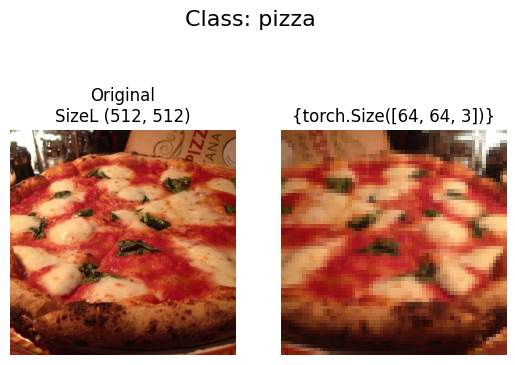

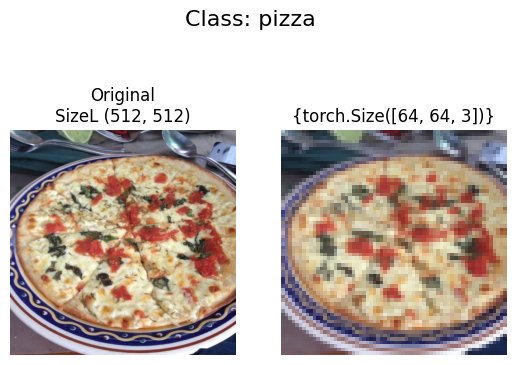

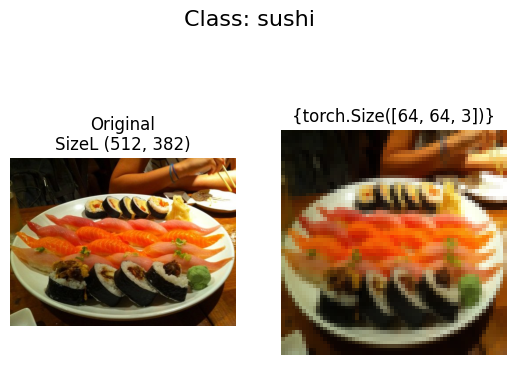

In [ ]:
def plot_transformed_images(image_paths, transforms, n=3, seed=42):
  random.seed(42)
  random_image_paths = random.sample(image_paths, k = n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows = 1, ncols = 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSizeL {f.size}")
      ax[0].axis(False)

      transformed_image = transforms(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title({transformed_image.shape})
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize = 16)
plot_transformed_images(image_path_list, data_transform, 3,42)

In [ ]:
from torchvision import datasets
train_data = datasets.ImageFolder(train_dir, data_transform, target_transform=None)
test_data = datasets.ImageFolder(test_dir, data_transform, target_transform=None)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
len(train_data), len(test_data)

(225, 75)

In [ ]:
image, label = train_data[0][0], train_data[0][1]
image

tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0157, 0.0157, 0.

torch.Size([3, 64, 64])
torch.Size([64, 64, 3])


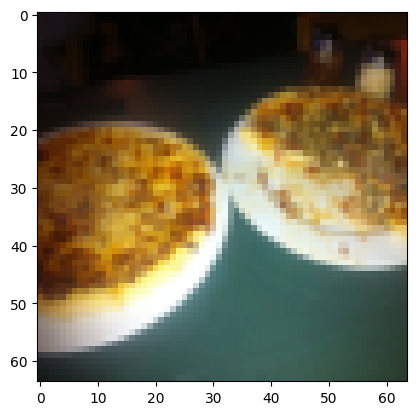

In [ ]:
print(image.shape)
image_permute = image.permute(1,2,0)

print(image_permute.shape)

plt.imshow(image_permute)

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(train_data, batch_size = 1, num_workers = 1, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 1, num_workers = 1, shuffle = False)


In [ ]:
img, label = next(iter(train_dataloader))
img.shape, label.shape

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List


In [ ]:
target_directory = train_dir
target_directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

['pizza', 'steak', 'sushi']

In [ ]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
  if not classes:
    raise FileNotFoundError(f"Coudnt find in {directory}")

  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [ ]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
  def __init__(self, targ_dir: str,
               transform = None):
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(targ_dir)

  def load_image(self, index: int) -> Image.Image:
    image_path = self.paths[index]
    return Image.open(image_path)

  def __len__(self) -> int:
    return len(self.paths)

  def __getitem__(self, index:int) -> Tuple[torch.Tensor, int]:
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]
    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx



In [ ]:
from torchvision import transforms
train_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])


In [ ]:
train_data_custom = ImageFolderCustom(train_dir, train_transforms)
test_data_custom = ImageFolderCustom(test_dir, test_transforms)

In [ ]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [ ]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
print(train_data_custom.classes==train_data.classes)

True


Creating a func to display random images

In [ ]:
def display_random_image(dataset: torch.utils.data.Dataset,
                         classes : List[str] = None,
                         n: int = 10,
                         display_shape : bool = True,
                         seed: int = None):
  if n > 10:
    n = 10
    display_shape = False
  if seed:
    random.seed(seed)
  random_samples_idx = random.sample(range(len(dataset)),k = n)
  plt.figure(figsize=(16,8))
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
    targ_image_adjust = targ_image.permute(1,2,0)
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Class:{classes[targ_label]}"
      if display_shape:
        title = title + f"\nShape: {targ_image_adjust.shape}"
    plt.title(title)

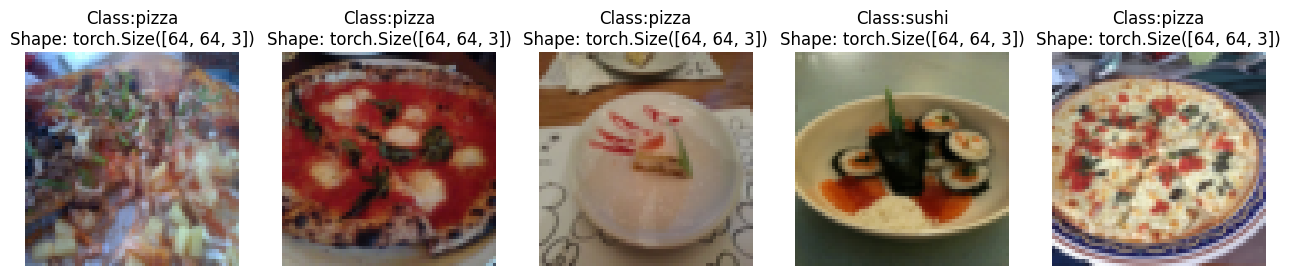

In [ ]:
display_random_image(train_data, n = 5, classes = class_names, seed = None)

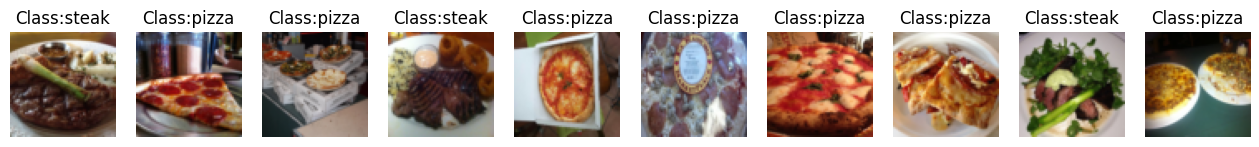

In [ ]:
display_random_image(train_data_custom, n = 20, classes = class_names, seed = 42)

Turn custom loaded images to dataloader

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader_custom = DataLoader(dataset = train_data_custom,
                                     batch_size = BATCH_SIZE,
                                     num_workers = 0,
                                     shuffle = True)
test_dataloader_custom = DataLoader(dataset = test_data_custom,
                                     batch_size = BATCH_SIZE,
                                     num_workers = 0,
                                     shuffle = False)
train_dataloader_custom

Other forms of transforms like augmentation|

In [ ]:
from torchvision import transforms
train_transform = transforms.Compose([
    transforms.Resize(size = (224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform = transforms.Compose([
    transforms.Resize(size = (224,224)),
    #transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

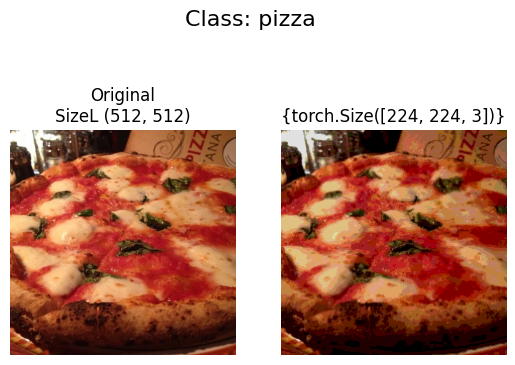

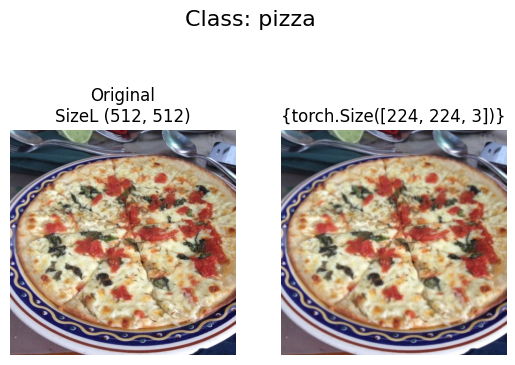

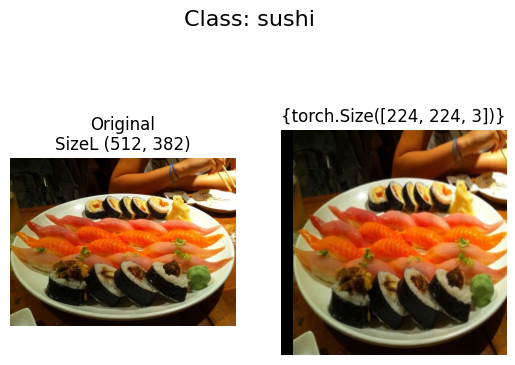

In [ ]:
plot_transformed_images(
    image_paths = image_path_list,
    transforms = train_transform,
    n = 3,
    seed = None
)

In [ ]:
simple_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                       transforms.ToTensor()])


In [ ]:
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root = train_dir, transform = simple_transform)
test_data_simple = datasets.ImageFolder(root = test_dir, transform = simple_transform)

import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader_simple =  DataLoader(train_data_simple,batch_size =  BATCH_SIZE, shuffle = True, num_workers = 0)
test_dataloader_simple =  DataLoader(test_data_simple,batch_size =  BATCH_SIZE, shuffle = False, num_workers = 0)

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                 out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units,3, 1, 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2, stride = 2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units,3, 1, 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2, stride = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(hidden_units*13*13, output_shape)
    )

  def forward(self, x):
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [ ]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape = 3, hidden_units = 10, output_shape = len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape

torch.Size([32, 3, 64, 64])

In [ ]:
model_0(image_batch.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4669e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9129e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6417e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7980e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1815e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3994e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.2317e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

In [ ]:
!pip install torchinfo
import torchinfo
from torchinfo import summary

In [ ]:
summary(model_0, input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device = device):
  model.train()
  train_loss, train_acc = 0,0
  for batch, (X,y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               device = device):
  model.eval()
  test_loss, test_acc = 0, 0
  with torch.inference_mode():
    for batch, (X,y ) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)
      test_pred_logits = model(X)
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device = device):
  results = {"train loss":[],
             "train acc":[],
             "test loss":[],
             "test acc" :[]}
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model, train_dataloader, loss_fn, optimizer, device)
    test_loss , test_acc = test_step(model, test_dataloader, loss_fn, device)
    print(f"Epoch: {epoch} | Train loss {train_loss} \ Train acc : {train_acc} \ Test loss: {test_loss} \ test acc: {test_acc}")
    results["train loss"].append(train_loss)
    results["train acc"].append(train_acc)
    results["test loss"].append(test_loss)
    results["test acc"].append(test_acc)
  return results

In [ ]:
torch.manual_seed(42)
NUM_EPOCHS = 5
model_0 = TinyVGG(3, 10, len(train_data.classes)).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(), lr = 0.002)
from timeit import default_timer as timer
start_time = timer()
model_0_results = train(model_0, train_dataloader_simple, test_dataloader_simple,
                        optimizer = optimizer, loss_fn = loss_fn, epochs = NUM_EPOCHS)
end_time = timer()
print(f"Total time:{end_time-start_time:.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss 1.1131035834550858 \ Train acc : 0.28515625 \ Test loss: 1.102805733680725 \ test acc: 0.19791666666666666
Epoch: 1 | Train loss 1.1007420718669891 \ Train acc : 0.31640625 \ Test loss: 1.0718278884887695 \ test acc: 0.5416666666666666
Epoch: 2 | Train loss 1.088391661643982 \ Train acc : 0.38671875 \ Test loss: 1.0731316407521565 \ test acc: 0.5123106060606061
Epoch: 3 | Train loss 1.0936524868011475 \ Train acc : 0.3359375 \ Test loss: 1.0455155769983928 \ test acc: 0.5321969696969697
Epoch: 4 | Train loss 1.0523445829749107 \ Train acc : 0.421875 \ Test loss: 1.0670229991277058 \ test acc: 0.3428030303030303
Total time:13.794


In [ ]:
model_0_results

{'train loss': [1.1131035834550858,
  1.1007420718669891,
  1.088391661643982,
  1.0936524868011475,
  1.0523445829749107],
 'train acc': [0.28515625, 0.31640625, 0.38671875, 0.3359375, 0.421875],
 'test loss': [1.102805733680725,
  1.0718278884887695,
  1.0731316407521565,
  1.0455155769983928,
  1.0670229991277058],
 'test acc': [0.19791666666666666,
  0.5416666666666666,
  0.5123106060606061,
  0.5321969696969697,
  0.3428030303030303]}

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
  loss = results["train loss"]
  test_loss = results["test loss"]

  accuracy = results["train acc"]
  test_accuracy = results["test acc"]

  epochs = range(len(results["train loss"]))
  plt.figure(figsize=(15,7))

  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train loss")
  plt.plot(epochs, test_loss, label="test loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label = "train accuracy")
  plt.plot(epochs, test_accuracy, label = "test accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

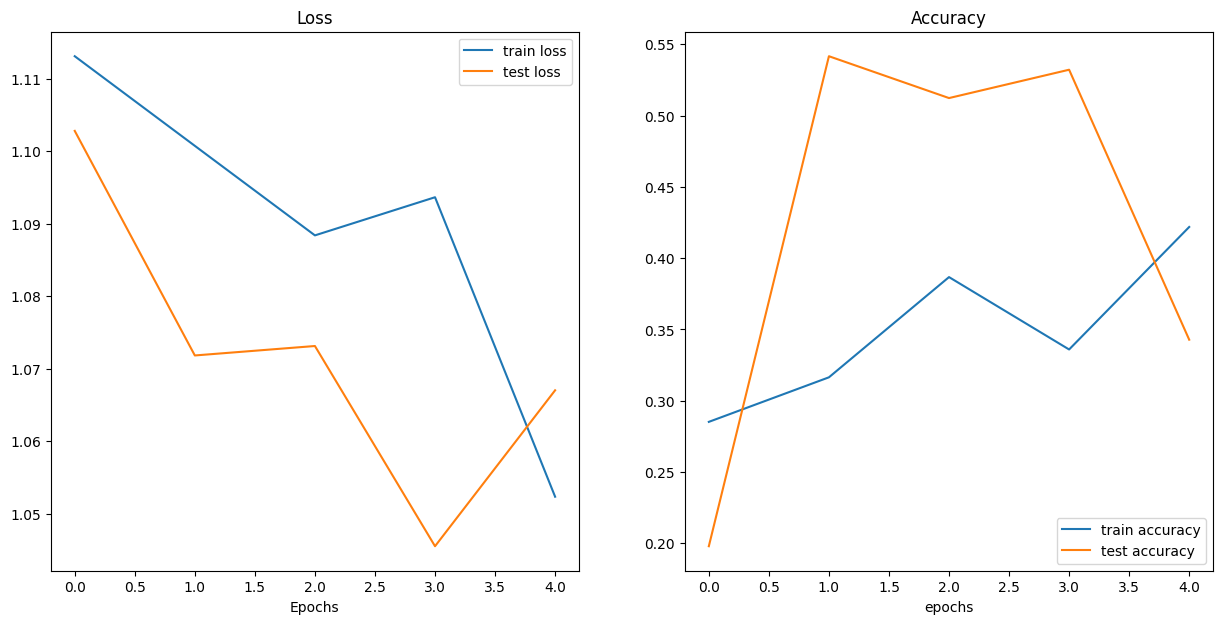

In [ ]:
plot_loss_curves(model_0_results)

TinyVGG with augmentation

In [ ]:
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31),
    transforms.ToTensor()
])

test_transform_simple = transforms.Compose([transforms.Resize(size = (64,64)),
                                             transforms.ToTensor()])


In [ ]:
train_data_augmented = datasets.ImageFolder(root = train_dir, transform = train_transform_trivial)
test_data_simple = datasets.ImageFolder(root = test_dir, transform = test_transform_simple)


In [ ]:
import os
BATCH_SIZE = 32

train_dataloader_augmented = DataLoader(dataset = train_data_augmented,
                                        batch_size = 32,
                                        shuffle = True,
                                        num_workers = os.cpu_count())
test_dataloader_simple = DataLoader(dataset = test_data_simple,
                                    batch_size = 32,
                                    shuffle = False,
                                    num_workers = os.cpu_count())


In [ ]:
model_1 = TinyVGG(3,10,len(train_data_augmented.classes)).to(device)

In [ ]:
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_1.parameters(), lr = 0.001)
start_time = timer()
model_1_results = train(model_1, train_dataloader_augmented, test_dataloader_simple,loss_fn =  loss_fn,optimizer =  optimizer, epochs = 5,device =  device)
end_time = timer()

print({end_time-start_time})

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss 1.0955696403980255 \ Train acc : 0.32421875 \ Test loss: 1.0913327534993489 \ test acc: 0.34375
Epoch: 1 | Train loss 1.0963655412197113 \ Train acc : 0.34375 \ Test loss: 1.0982678731282551 \ test acc: 0.2916666666666667
Epoch: 2 | Train loss 1.1097753793001175 \ Train acc : 0.41796875 \ Test loss: 1.088771144549052 \ test acc: 0.3125
Epoch: 3 | Train loss 1.0599056482315063 \ Train acc : 0.42578125 \ Test loss: 1.074388901392619 \ test acc: 0.4043560606060606
Epoch: 4 | Train loss 1.0413471013307571 \ Train acc : 0.50390625 \ Test loss: 1.0438023408253987 \ test acc: 0.4744318181818182
{20.211378962999987}


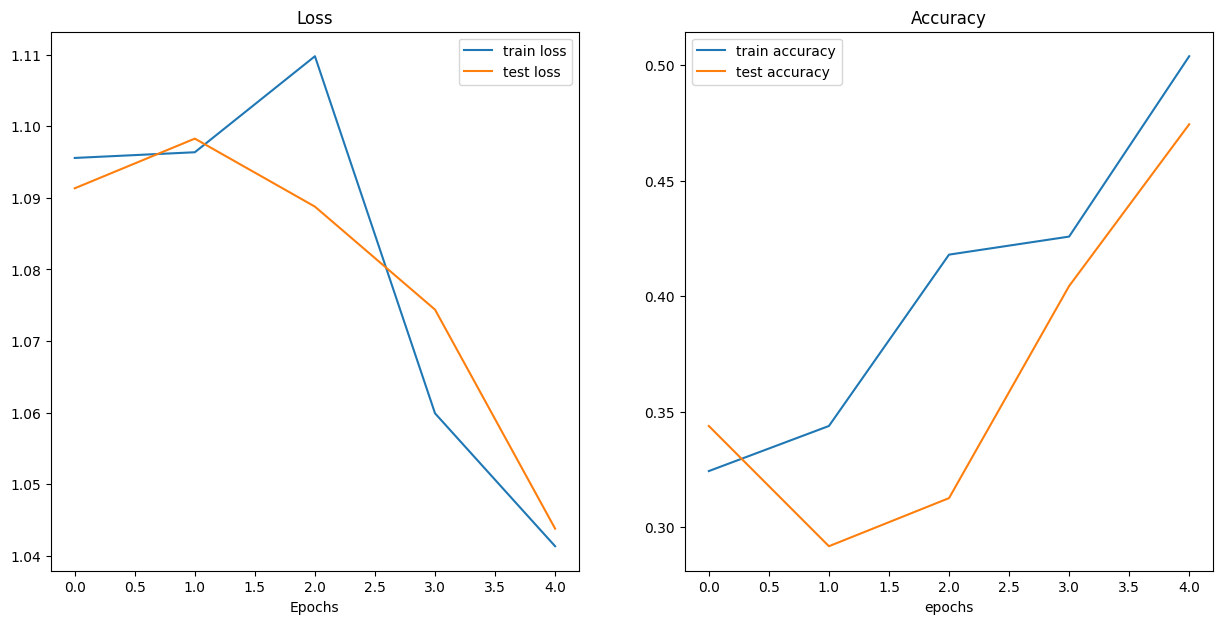

In [ ]:
plot_loss_curves(model_1_results)

In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train loss,train acc,test loss,test acc
0,1.113104,0.285156,1.102806,0.197917
1,1.100742,0.316406,1.071828,0.541667
2,1.088392,0.386719,1.073132,0.512311
3,1.093652,0.335938,1.045516,0.532197
4,1.052345,0.421875,1.067023,0.342803


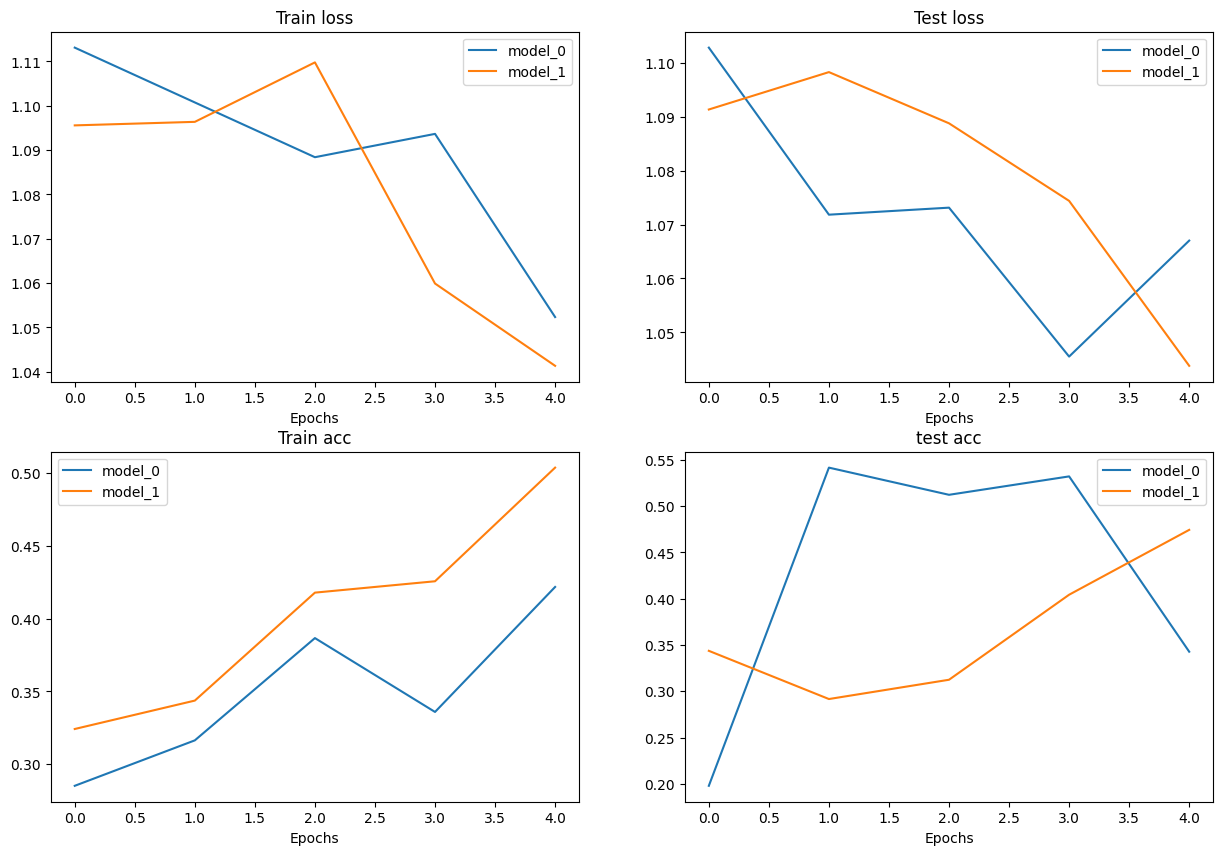

In [ ]:
plt.figure(figsize = (15,10))
epochs = range(len(model_0_df))

plt.subplot(2,2,1)
plt.plot(epochs, model_0_df["train loss"], label = "model_0")
plt.plot(epochs, model_1_df["train loss"], label = "model_1")
plt.title("Train loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, model_0_df["test loss"], label = "model_0")
plt.plot(epochs, model_1_df["test loss"], label = "model_1")
plt.title("Test loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, model_0_df["train acc"], label = "model_0")
plt.plot(epochs, model_1_df["train acc"], label = "model_1")
plt.title("Train acc")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, model_0_df["test acc"], label = "model_0")
plt.plot(epochs, model_1_df["test acc"], label = "model_1")
plt.title("test acc")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
import requests

custom_image_path = data_path / "04-pizza-dad.jpeg"

if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
    print(f"Downloading")
    f.write(request.content)
else:
  print(f"already exist")

Downloading


Custom image predictions

In [ ]:
import torchvision
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
custom_image_uint8.shape

torch.Size([3, 4032, 3024])

In [ ]:
model_1.eval()
with torch.inference_mode():
  model_1(custom_image_uint8.to(device))

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [ ]:
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) /255
custom_image

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

In [ ]:
custom_image_transform = transforms.Compose([transforms.Resize(size=(64,64))])
custom_image_transformed = custom_image_transform(custom_image)

In [ ]:
model_1.eval()
with torch.inference_mode():
  model_1(custom_image_transformed.to(device))
#batch size issue

In [ ]:
custom_image_transformed.unsqueeze(0).shape

In [ ]:
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))

In [ ]:
custom_image_pred_probs = torch.softmax(custom_image_pred, dim = 1)


In [ ]:
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim = 1)

In [ ]:
def pred_and_plot(model: torch.nn.Module,
                  image_path: str,
                  class_names: List[str]= None,
                  transform = None,
                  device = device):
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
  target_image = target_image / 255
  if transform:
    target_image = transform(target_image)
  model.to(device)

  model.eval()
  with torch.inference_mode():
    target_image = target_image.unsqueeze(0)#for batch size
    target_image_pred = model(target_image.to(device))
  target_image_pred_probs = torch.softmax(target_image_pred, dim = 1)
  target_image_pred_label = torch.argmax(target_image_pred_probs, dim = 1)
  plt.imshow(target_image.squeeze().permute(1,2,0))
  if class_names:
    title = f"pred : {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  else:
    title = f"Pred : {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  plt.title(title)
  plt.axis("off")

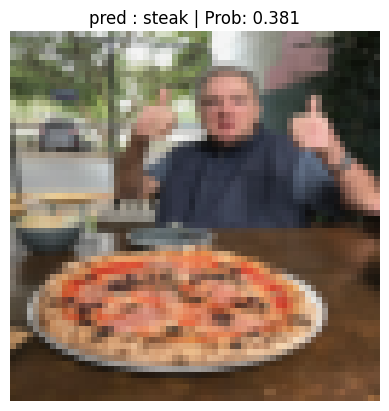

In [ ]:
pred_and_plot(model_1,custom_image_path, class_names, custom_image_transform, device)